In [61]:
import pandas as pd

In [62]:
import japanize_matplotlib
import matplotlib.pyplot as plt
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 10

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (16,10)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

In [63]:
df_list = []
for i in range(0, 70, 5):
    df = pd.read_csv('../../../../sample_data/data/result/threshold_2000_epoch_50_w/threshold_2000_epoch_50_weighted_random_camel_'+str(i)+'.csv')
    df_list.append(df)

Text(0, 0.5, 'AUC')

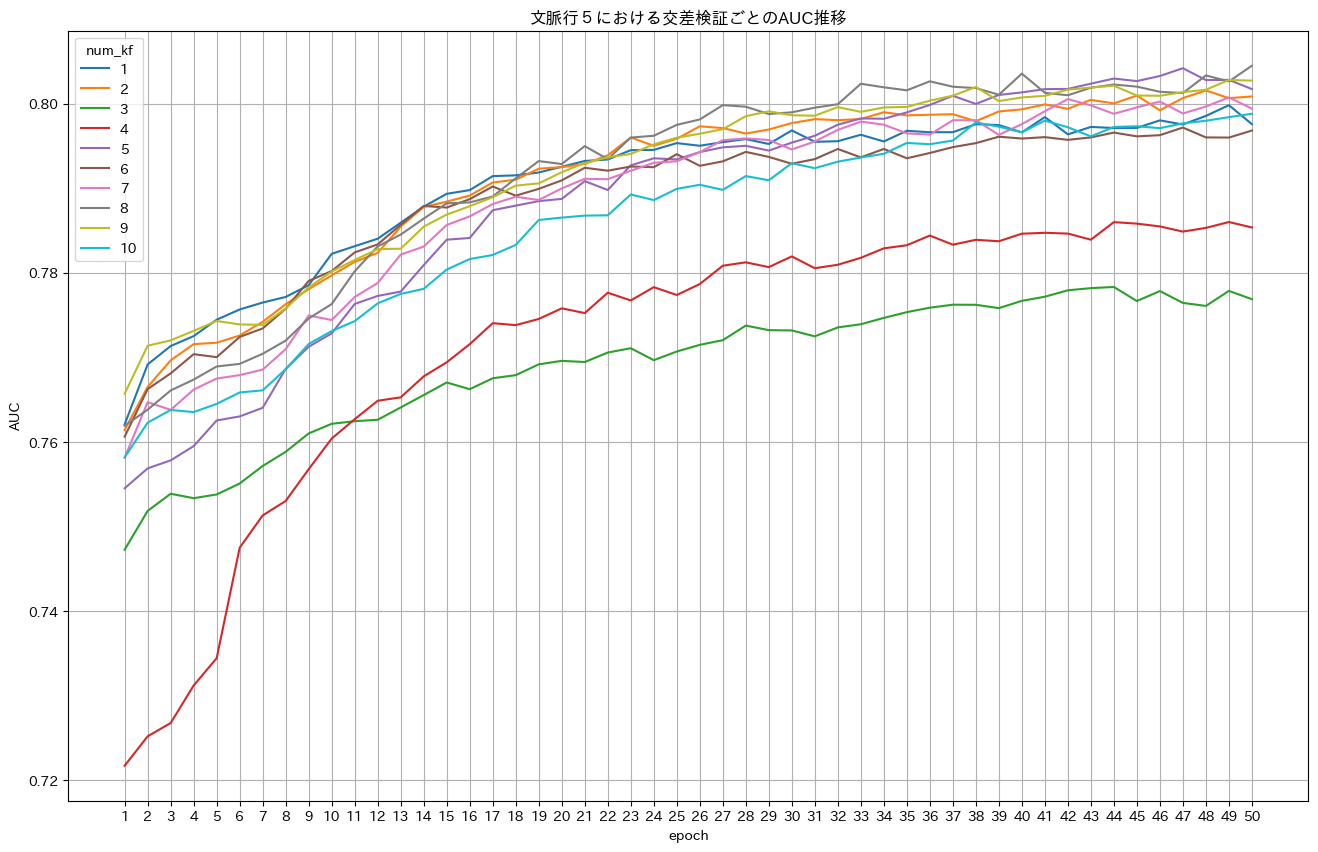

In [64]:
tmp_df =  df_list[9][df_list[9]['score_type'] == 'auc_score']
tmp_df
columns_list = tmp_df.columns.to_list()[4:]
columns_list[:0] = ['num_kf']
tmp_df = tmp_df[columns_list]
tmp_df = tmp_df.set_index('num_kf')
tmp_df

tmp_df.T.plot(xticks=range(len(columns_list[1:])))
plt.title('文脈行５における交差検証ごとのAUC推移')
plt.xlabel('epoch')
plt.ylabel('AUC')

                                       1         2         3         4  \
filename                                                                 
txt_vec_and_label_camel_0.csv   0.759858  0.765831  0.768607  0.771008   
txt_vec_and_label_camel_5.csv   0.764936  0.769711  0.771497  0.772621   
txt_vec_and_label_camel_10.csv  0.765419  0.769605  0.771412  0.773117   
txt_vec_and_label_camel_15.csv  0.765510  0.768931  0.770371  0.771749   
txt_vec_and_label_camel_20.csv  0.764688  0.767903  0.769404  0.770528   
txt_vec_and_label_camel_25.csv  0.762625  0.766010  0.768037  0.768482   
txt_vec_and_label_camel_30.csv  0.758651  0.762482  0.764144  0.765828   
txt_vec_and_label_camel_35.csv  0.757896  0.760527  0.761682  0.762582   
txt_vec_and_label_camel_40.csv  0.757710  0.760415  0.762225  0.763570   
txt_vec_and_label_camel_45.csv  0.755151  0.759799  0.761321  0.762874   
txt_vec_and_label_camel_50.csv  0.754271  0.758083  0.759611  0.761917   
txt_vec_and_label_camel_55.csv  0.7521

<Axes: >

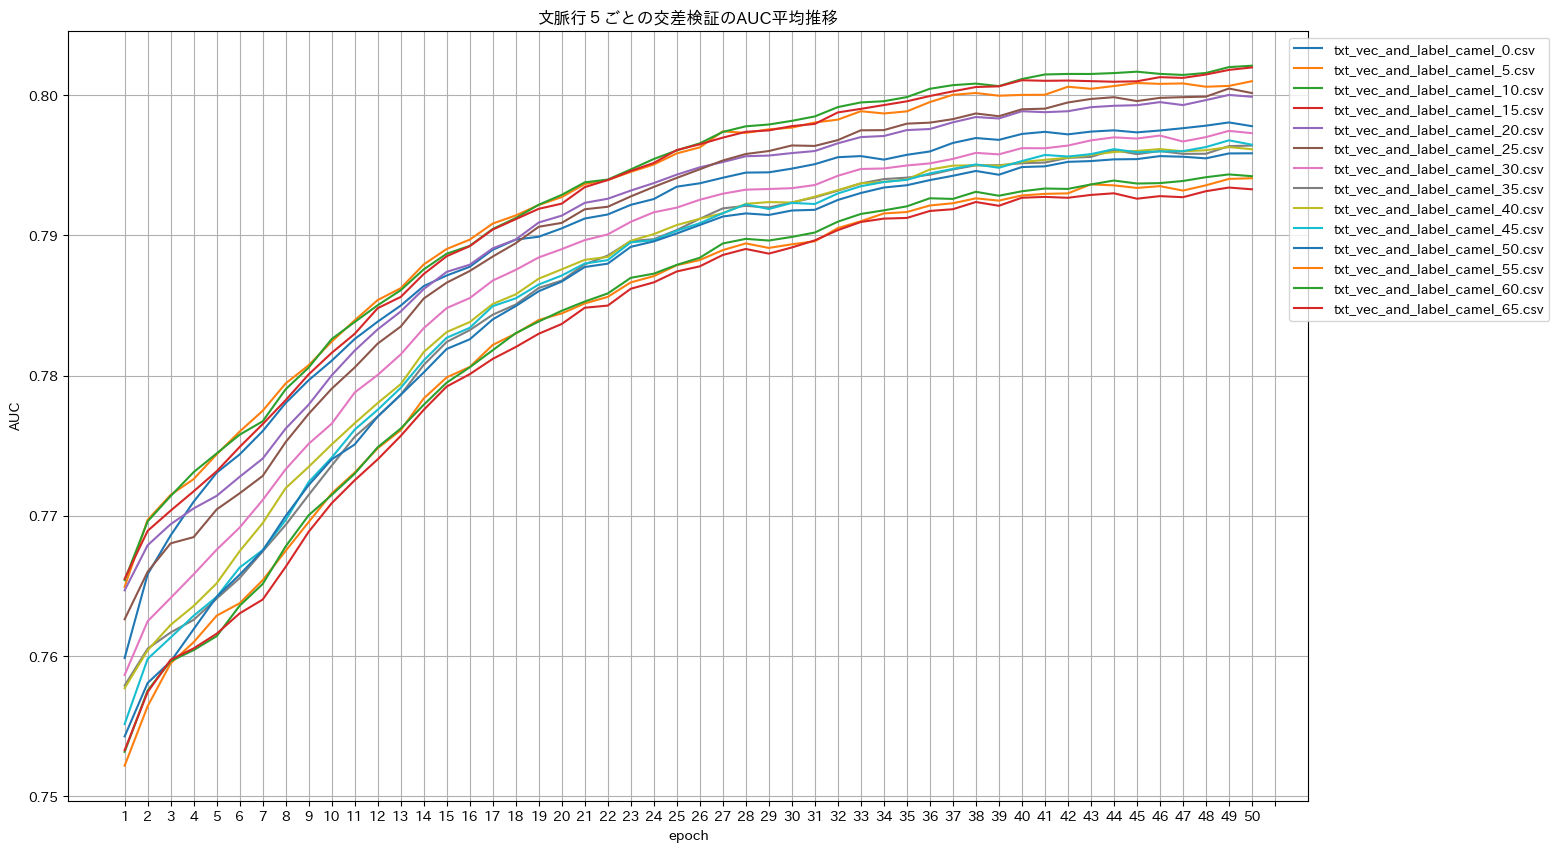

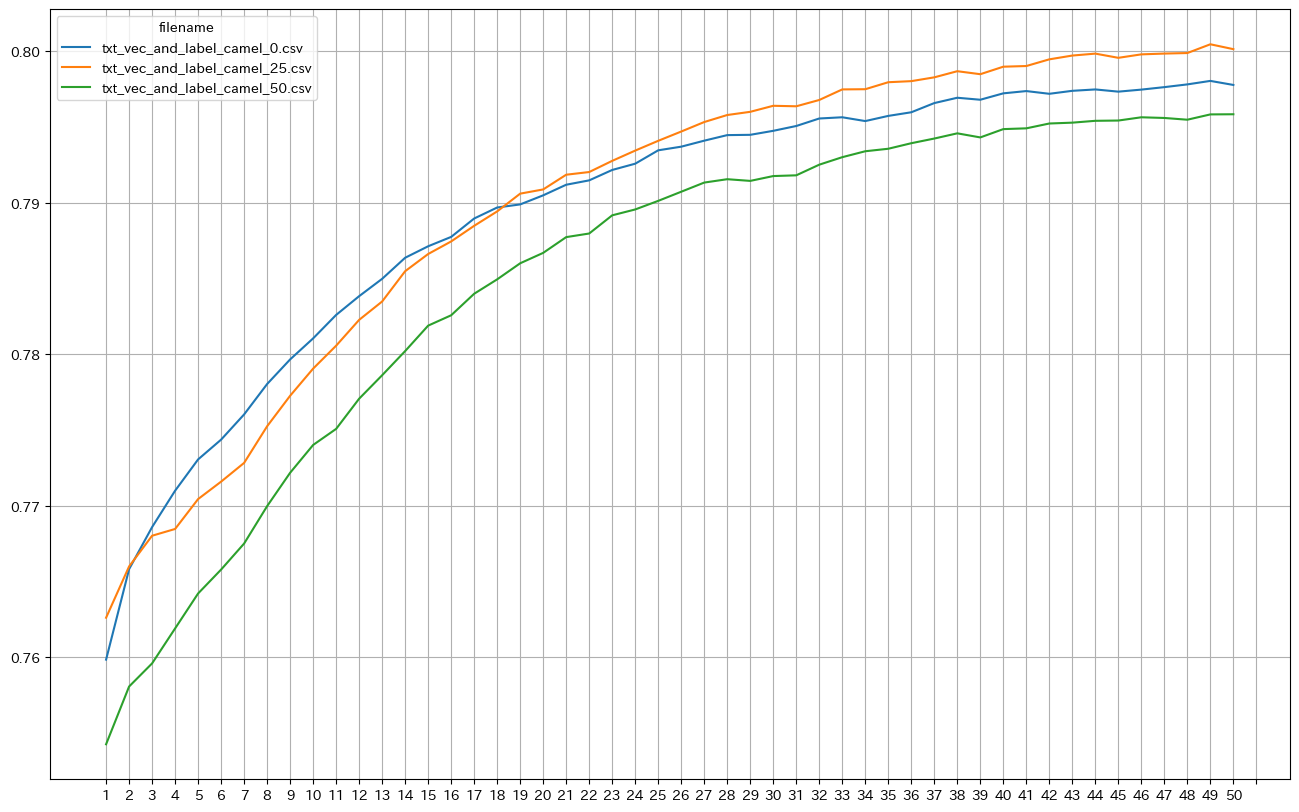

In [65]:
df_list2 = []
for df in df_list:
    df_list2.append(df[df['score_type'] == 'auc_score'])

con_df = pd.DataFrame()
columns_list = df_list2[0].columns.to_list()[4:]
columns_list[:0] = ['filename']
for df in df_list2:
    con_df= pd.concat([con_df, df[columns_list].groupby(['filename']).mean()], axis=0)

con_df.T.plot(xticks=range(len(columns_list))).legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.title('文脈行５ごとの交差検証のAUC平均推移')
plt.xlabel('epoch')
plt.ylabel('AUC')
print(con_df)
separate_5_df = con_df[::5]
separate_5_df.T.plot(xticks=range(len(columns_list)))

Text(0, 0.5, 'AUC')

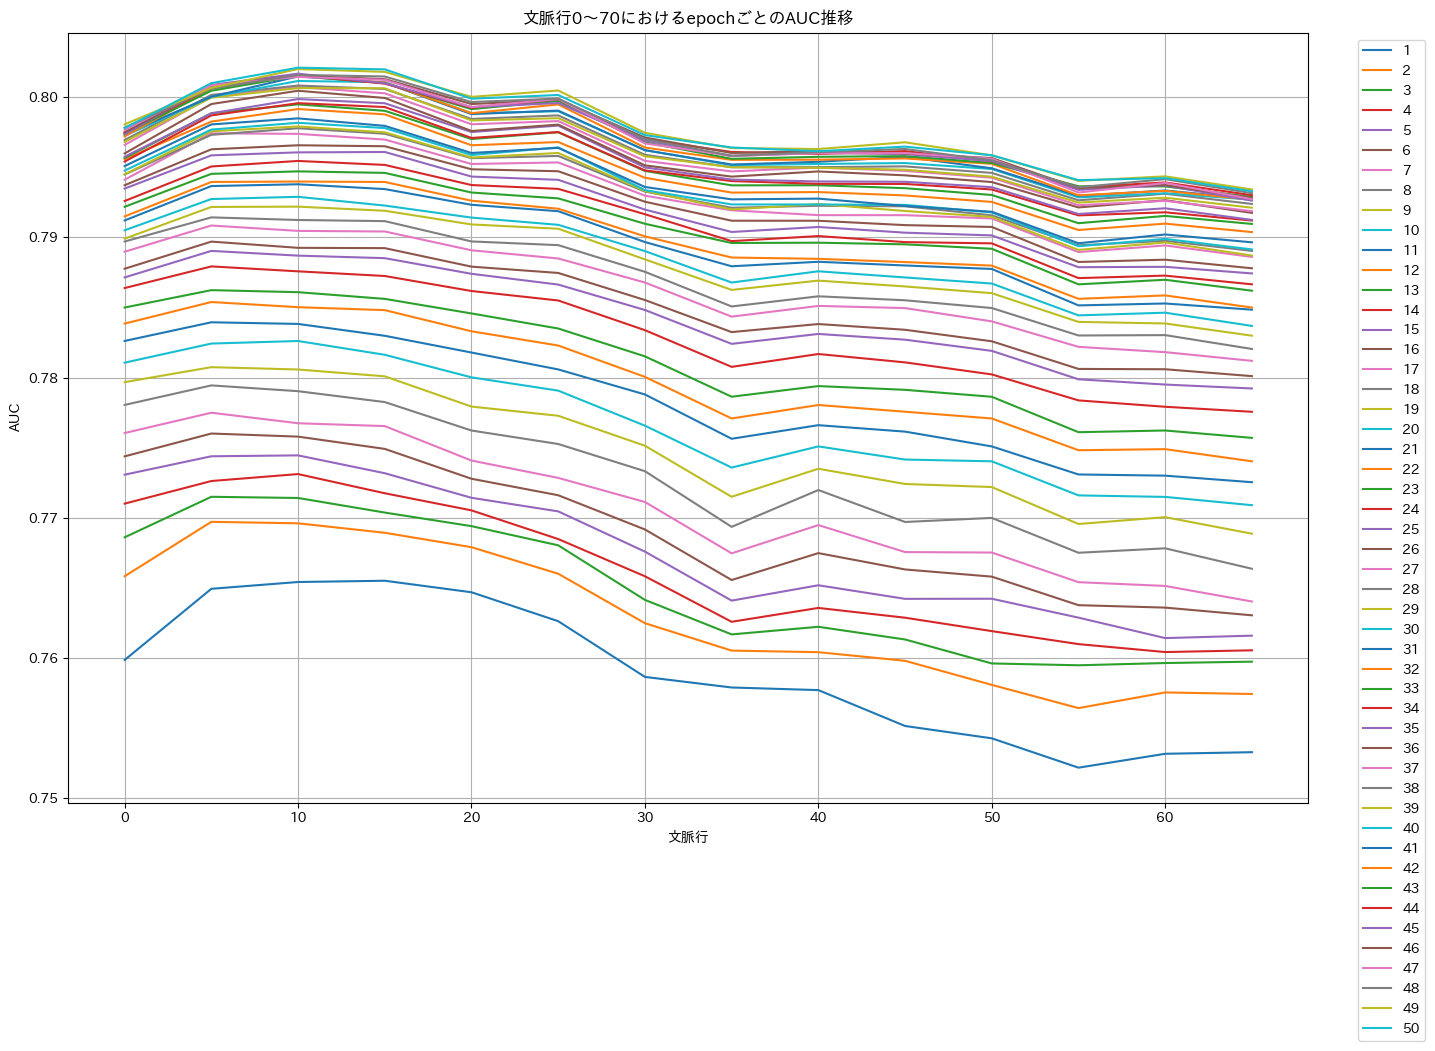

In [67]:
tem_df = con_df.reset_index()
columns_list2 = tem_df.columns.to_list()
tem_df = tem_df[columns_list2]
tem_df['id'] = [i for i in range(0,70,5)]
tem_df = tem_df.set_index('id')
tem_df = tem_df.drop('filename', axis='columns')
tem_df.plot().legend(bbox_to_anchor=(1.1, 1),loc='upper right')
plt.title('文脈行0～70におけるepochごとのAUC推移')
plt.xlabel('文脈行')
plt.ylabel('AUC')

<Axes: >

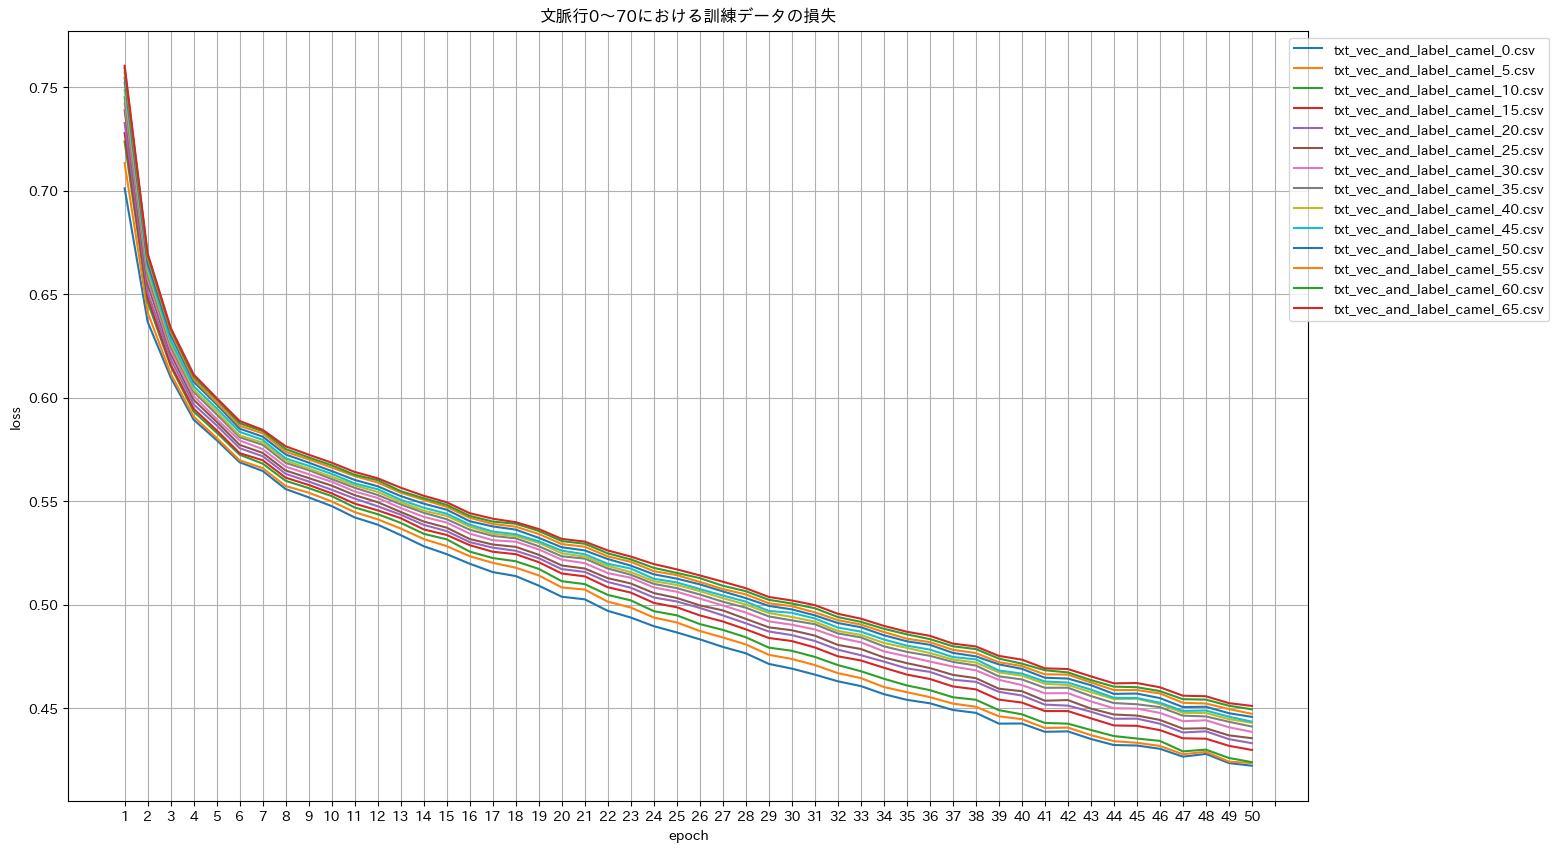

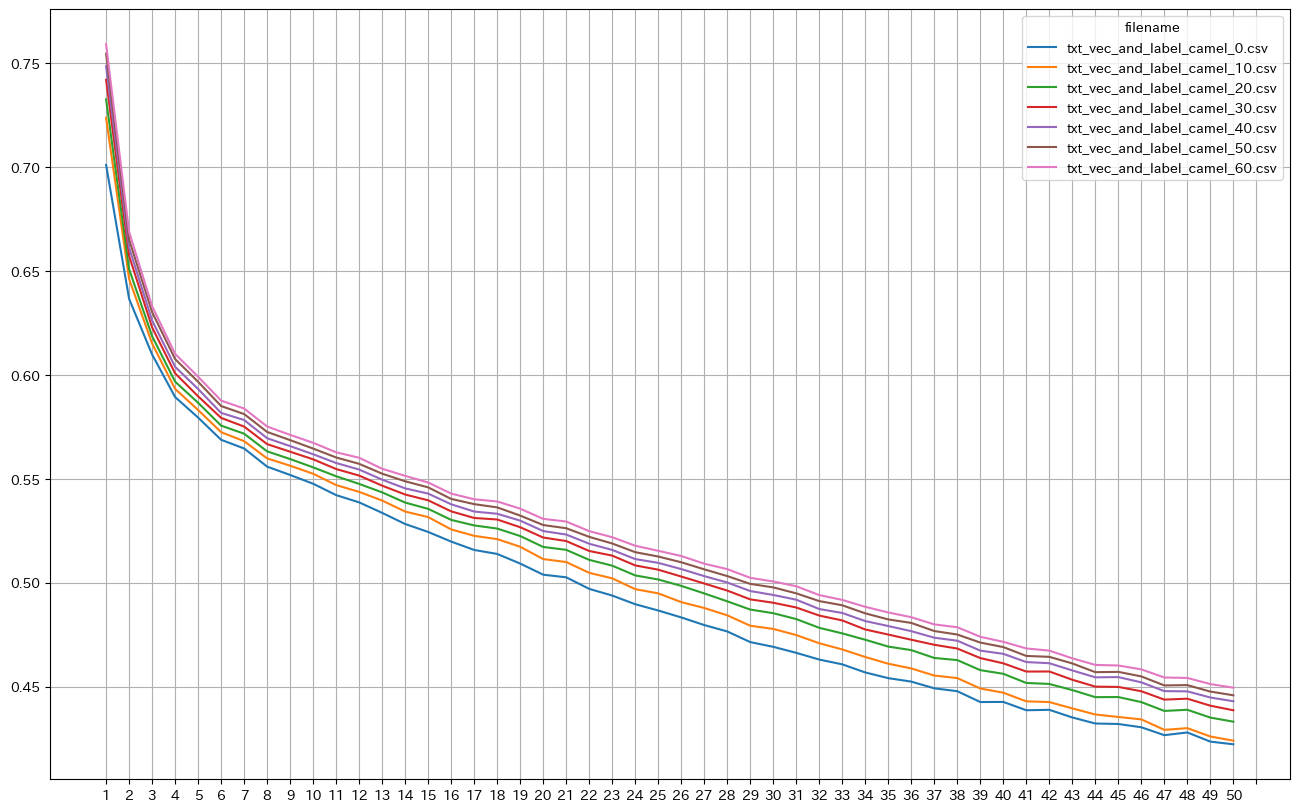

In [68]:
train_loss_df_list = []
for df in df_list:
    train_loss_df_list.append(df[df['score_type'] == 'train_loss'])
    
train_loss_con_df = pd.DataFrame()
columns_list = train_loss_df_list[0].columns.to_list()[4:]
columns_list[:0] = ['filename']
for df in train_loss_df_list:
    train_loss_con_df= pd.concat([train_loss_con_df, df[columns_list].groupby(['filename']).mean()], axis=0)

train_loss_con_df.T.plot(xticks=range(len(columns_list))).legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.title('文脈行0～70における訓練データの損失')
plt.xlabel('epoch')
plt.ylabel('loss')
separate_5_train_loss_df = train_loss_con_df[::2]
separate_5_train_loss_df.T.plot(xticks=range(len(columns_list)))
    

<Axes: >

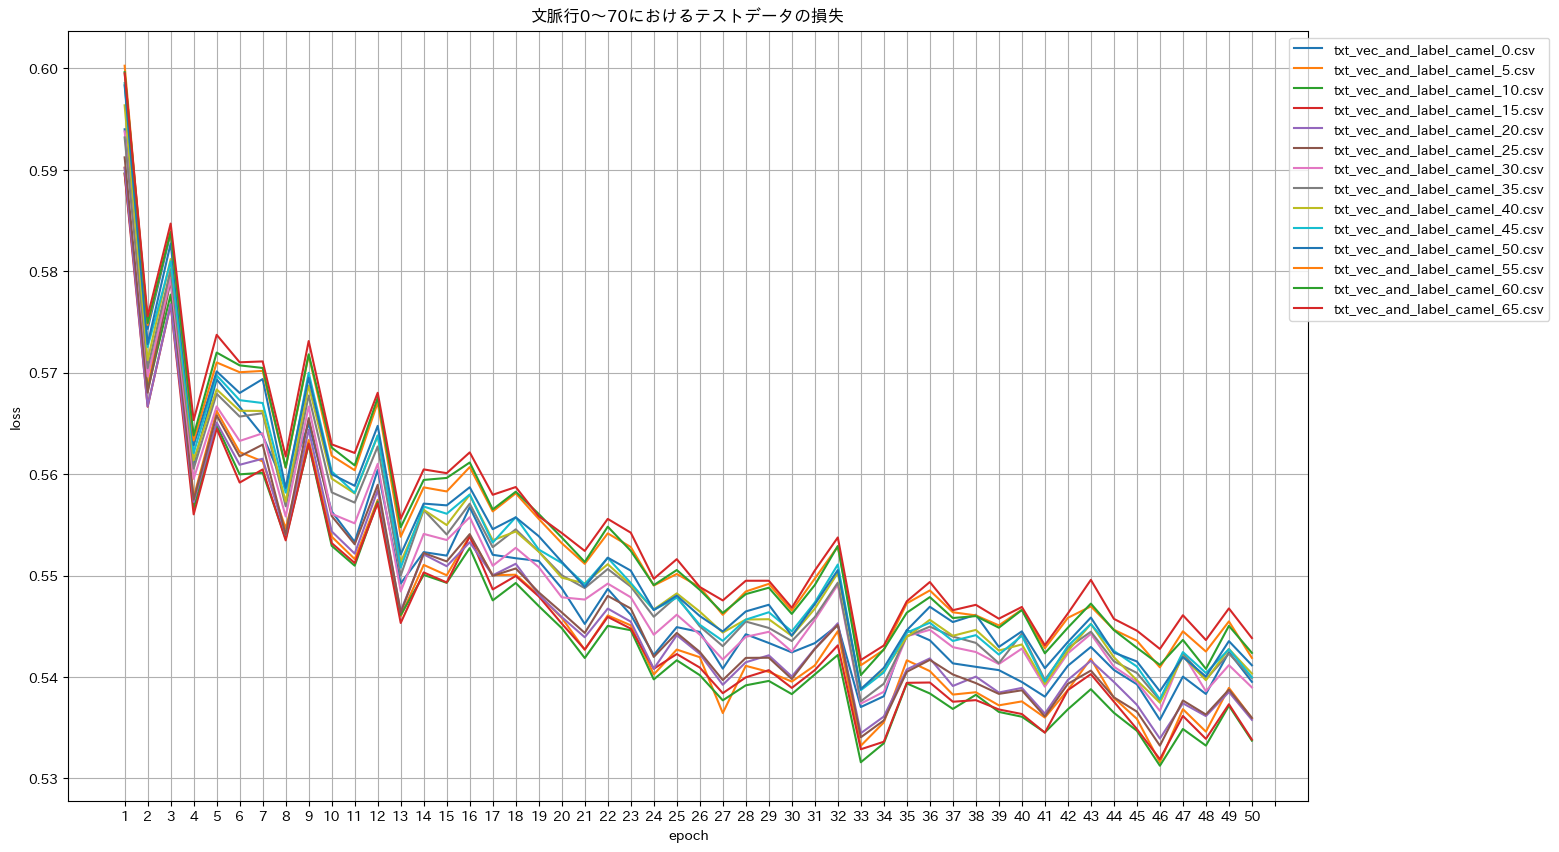

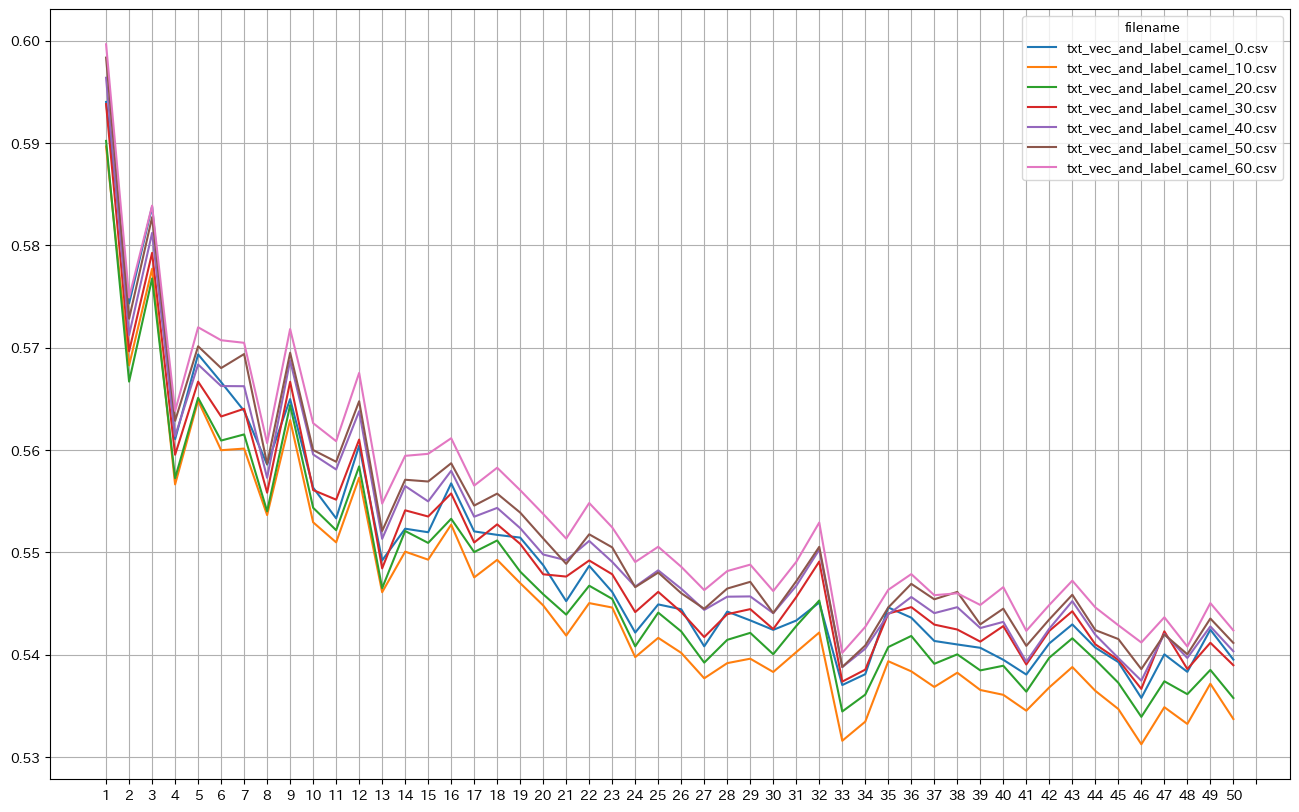

In [72]:
test_loss_df_list = []
for df in df_list:
    test_loss_df_list.append(df[df['score_type'] == 'test_loss'])
    
test_loss_con_df = pd.DataFrame()
columns_list = test_loss_df_list[0].columns.to_list()[4:]
columns_list[:0] = ['filename']
for df in test_loss_df_list:
    test_loss_con_df= pd.concat([test_loss_con_df, df[columns_list].groupby(['filename']).mean()], axis=0)
# print(test_loss_con_df)
test_loss_con_df.T.plot(xticks=range(len(columns_list))).legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.title('文脈行0～70におけるテストデータの損失')
plt.xlabel('epoch')
plt.ylabel('loss')
separate_5_test_loss_df = test_loss_con_df[::2]
separate_5_test_loss_df.T.plot(xticks=range(len(columns_list)))

<Axes: >

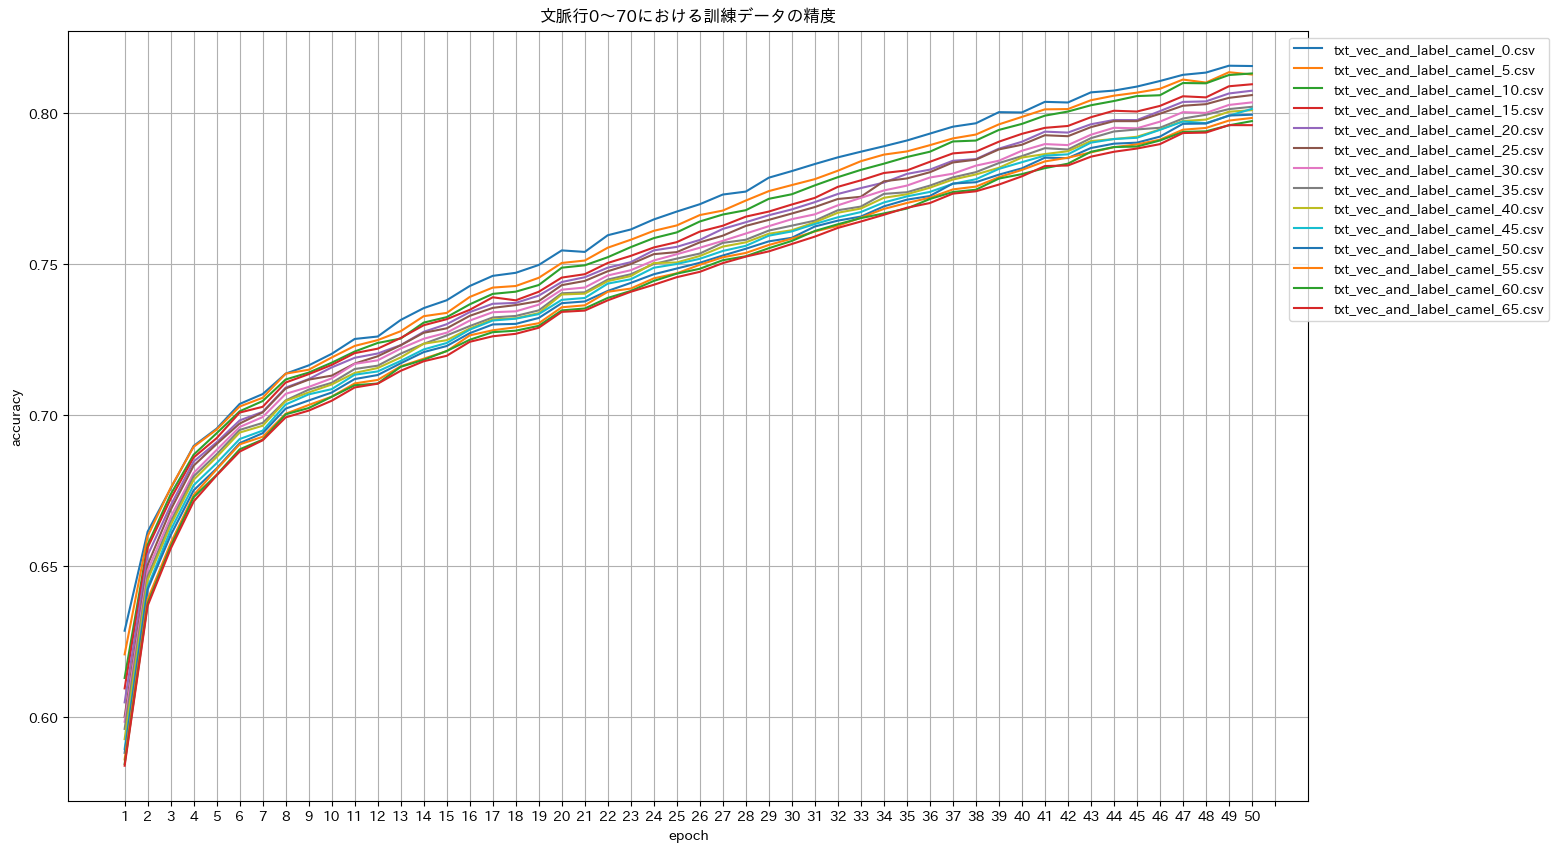

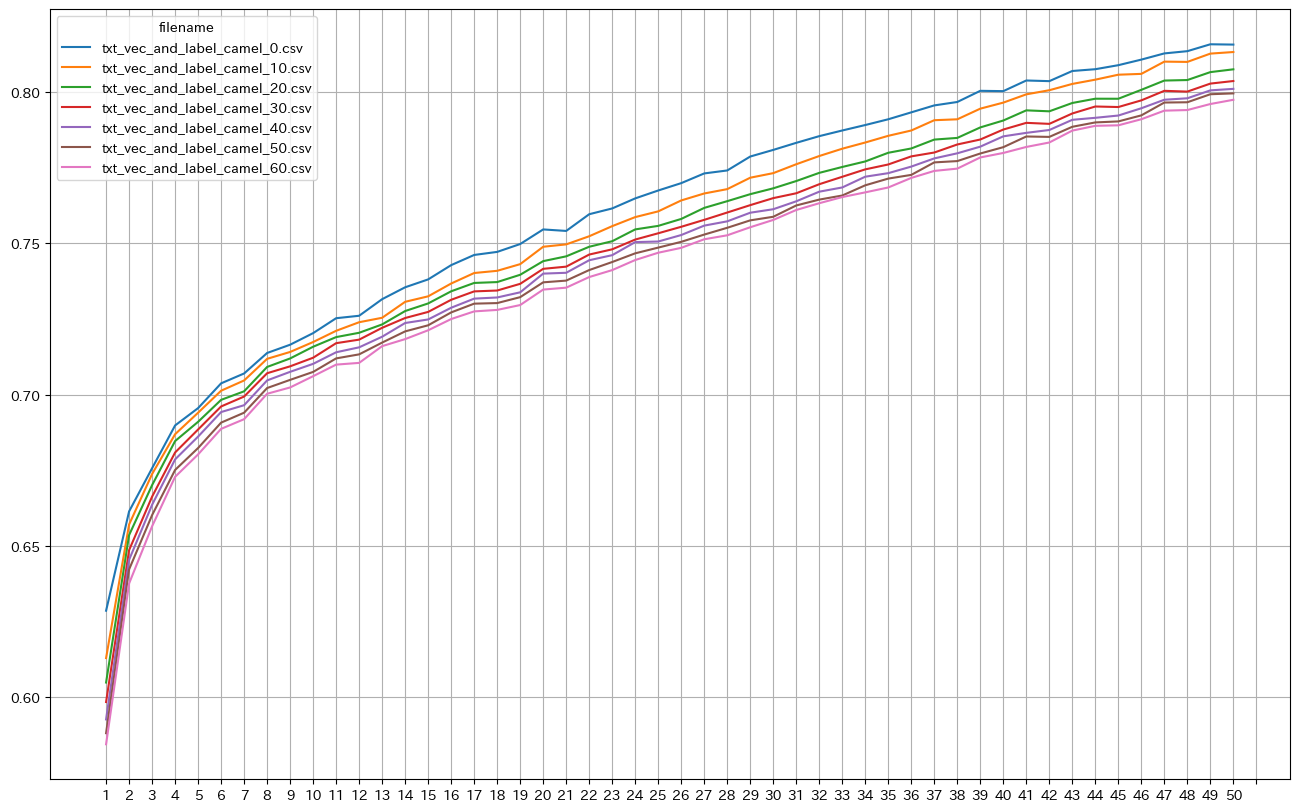

In [70]:
train_acc_df_list = []
for df in df_list:
    train_acc_df_list.append(df[df['score_type'] == 'train_acc'])
    
train_acc_con_df = pd.DataFrame()
columns_list = train_acc_df_list[0].columns.to_list()[4:]
columns_list[:0] = ['filename']
for df in train_acc_df_list:
    train_acc_con_df= pd.concat([train_acc_con_df, df[columns_list].groupby(['filename']).mean()], axis=0)

train_acc_con_df.T.plot(xticks=range(len(columns_list))).legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.title('文脈行0～70における訓練データの精度')
plt.xlabel('epoch')
plt.ylabel('accuracy')
separate_5_train_acc_df = train_acc_con_df[::2]
separate_5_train_acc_df.T.plot(xticks=range(len(columns_list)))

<Axes: >

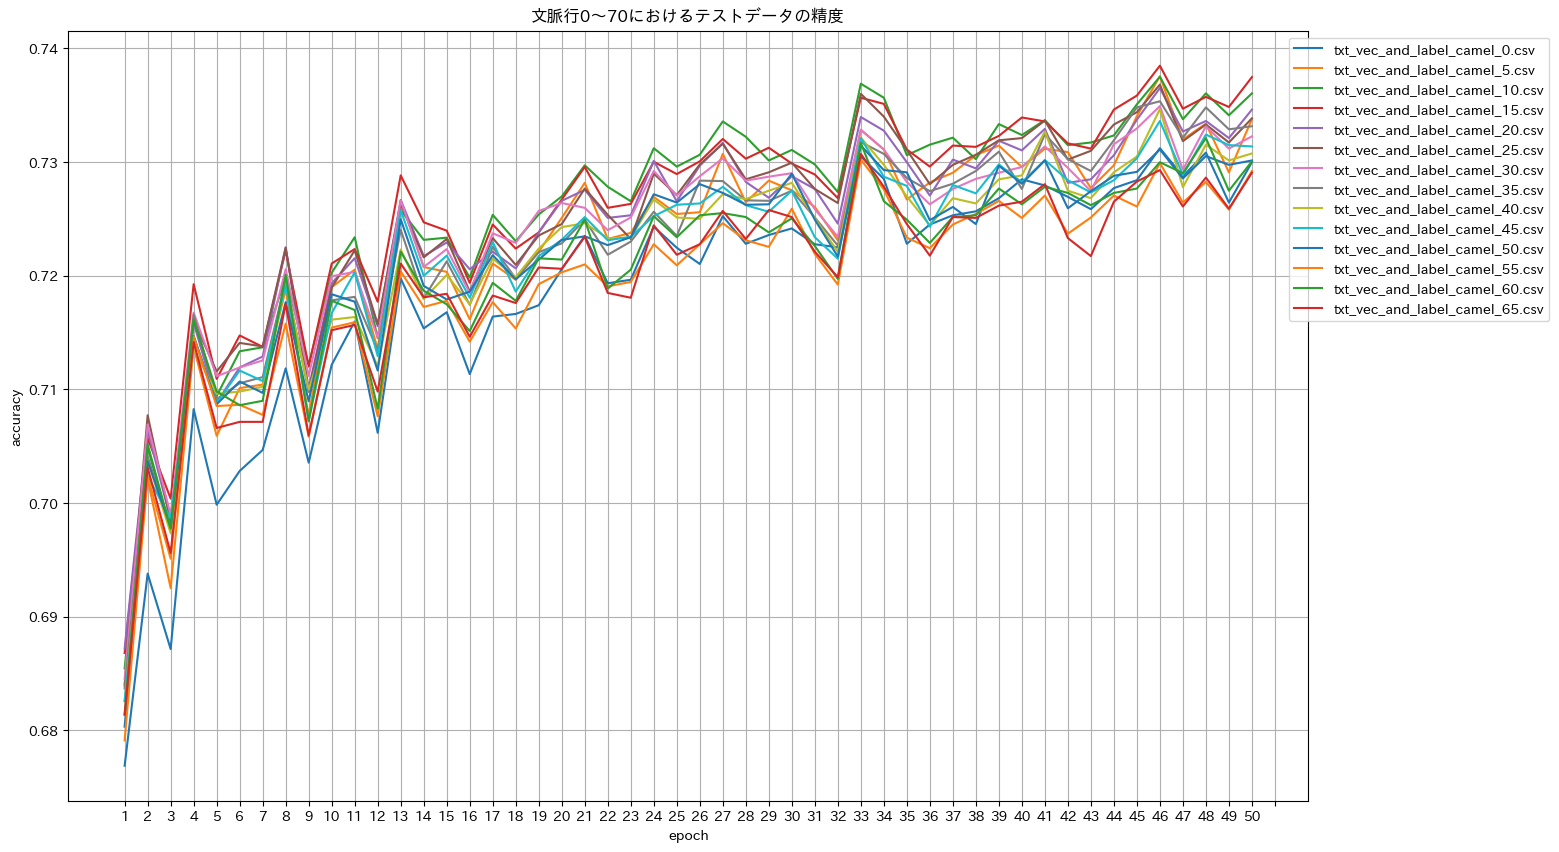

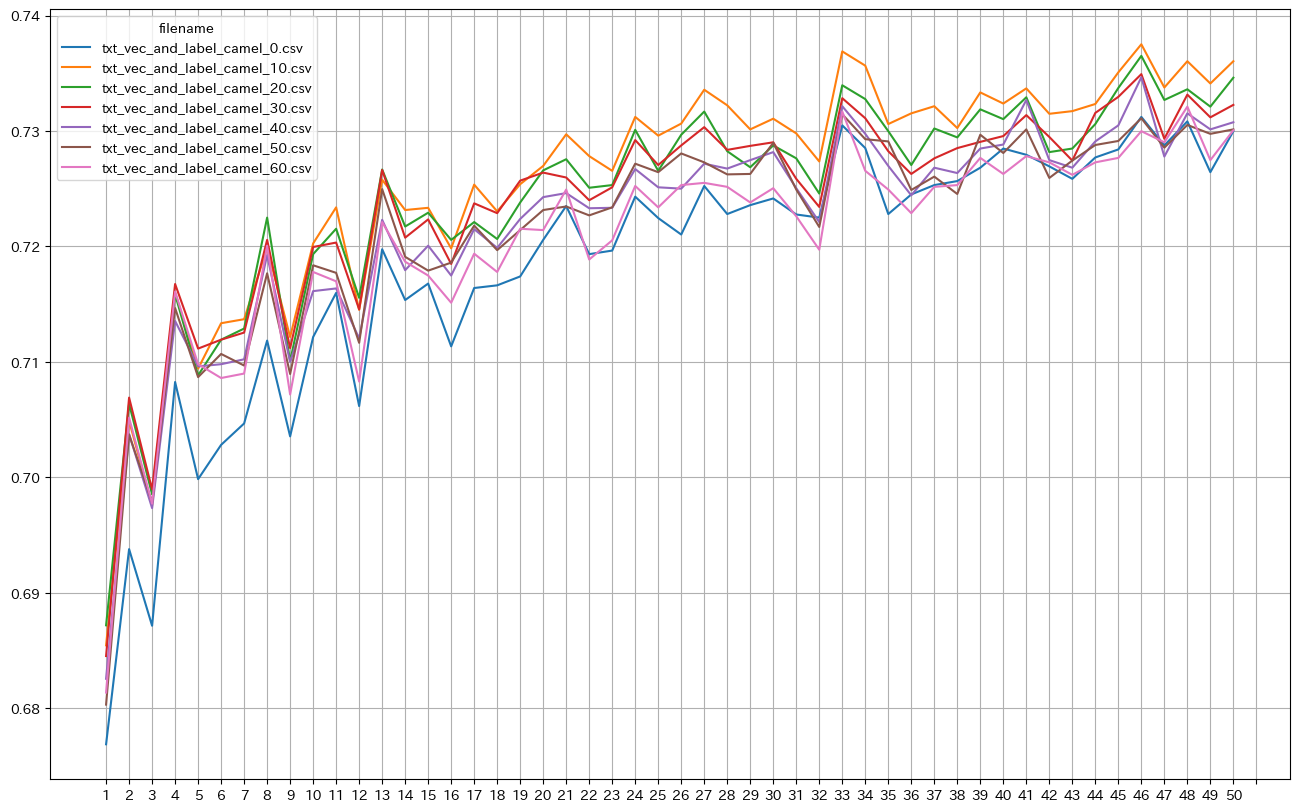

In [73]:
test_acc_df_list = []
for df in df_list:
    test_acc_df_list.append(df[df['score_type'] == 'test_acc'])
    
test_acc_con_df = pd.DataFrame()
columns_list = test_acc_df_list[0].columns.to_list()[4:]
columns_list[:0] = ['filename']
for df in test_acc_df_list:
    test_acc_con_df= pd.concat([test_acc_con_df, df[columns_list].groupby(['filename']).mean()], axis=0)

test_acc_con_df.T.plot(xticks=range(len(columns_list))).legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.title('文脈行0～70におけるテストデータの精度')
plt.xlabel('epoch')
plt.ylabel('accuracy')
separate_5_test_acc_df = test_acc_con_df[::2]
separate_5_test_acc_df.T.plot(xticks=range(len(columns_list)))